# Dynamic Programming

We will be using dynamic programming on sample 4x4 grid world and study **Policy Evaluation** 


### Policy Iteration (Prediction)

Policy iteration is carried out by converting Bellman Expectation equation for state values to an iterative assignment equation. The backup digram is given below. Pseudo code for the algorithm is given in Fig 3-3


Sure, here's a simplified explanation:

In the context of reinforcement learning, "policy iteration" is a method used to find the best way for an agent (like a robot or a game character) to act in a given environment to achieve a goal.

1. **Policy**: This is like a set of rules or a strategy that tells the agent what action to take in each situation.

2. **Bellman Expectation Equation**: This is a mathematical formula that helps us calculate the expected long-term reward for each state (situation) if the agent follows a certain policy.

3. **Iterative Assignment Equation**: Instead of solving the Bellman equation directly (which can be very complex), we use an iterative approach. This means we start with an initial guess and repeatedly update it to get closer to the true values.

4. **Backup Diagram**: This is a visual representation of how the values are updated in each iteration.

5. **Pseudo Code**: This is a simplified version of the code that shows the steps of the algorithm without getting into the details of a specific programming language.

In summary, policy iteration is a method where we start with an initial policy, evaluate how good it is using the Bellman equation, and then improve the policy based on this evaluation. We repeat this process until we find the best policy.

#### Running in Colab/Kaggle

If you are running this on Colab, please uncomment below cell and run this to install required dependencies.

In [25]:
## Uncomment and execute this cell to install all the the dependencies if running in Google Colab or Kaggle

## Uncomment and run for Colab
# !git clone https://github.com/nsanghi/drl-2ed
# %cd /content/drl-2ed 
# %cd chapter3


## Uncomment and run for Kaggle
# !git clone https://github.com/nsanghi/drl-2ed
# %cd /content/drl-2ed 
# %cd chapter3

In [26]:
# Initial imports and environment setup
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

# create grid world environment
from gridworld import GridworldEnv
env = GridworldEnv()

In [27]:
# Policy Evaluation

def policy_eval(policy, env, discount_factor=1.0, theta=0.00001):
    """
    Evaluate a policy given an environment.

    Args:
        policy:[S, A]shaped matrix representing the policy. Random in our case
        env: env.P -> transition dynamics of the environment.
            env.P[s][a] [(prob, next_state, reward, done)].
            env.nS is number of states in the environment.
            env.nA is number of actions in the environment.
        theta: Stop iteration once value function change is
            less than theta for all states.
        discount_factor: Gamma discount factor.

    Returns:
        Vector of length env.nS representing the value function.
    """
    # Start with a (all 0) value function
    V = np.zeros(env.nS)
    V_new = np.copy(V)
    iteration = 0
    while True:
        delta = 0
        iteration += 1
        print(f"Iteration: {iteration}")
        # For each state, perform a "backup"
        for s in range(env.nS):
            v = 0
            # Look at the possible next actions
            for a, pi_a in enumerate(policy[s]):
                # For each action, look at the possible next states...
                for prob, next_state, reward, done in env.P[s][a]:
                    # Calculate the expected value as per backup diagram
                    v += pi_a * prob * \
                        (reward + discount_factor * V[next_state])
            # How much our value function changed (across states)
            V_new[s] = v
            delta = max(delta, np.abs(V_new[s] - V[s]))
        V = np.copy(V_new)
        print(f"Value Function: {V}")
        print(f"Delta: {delta}\n")
        # Stop if change is below a threshold
        if delta < theta:
            break
    return np.array(V)

In [28]:
# Custom print to show state values inside the grid
def grid_print(V, k=None):
    ax = sns.heatmap(V.reshape(env.shape),
                     annot=True, square=True,
                     cbar=False, cmap='Blues',
                     xticklabels=False, yticklabels=False)

    if k:
        ax.set(title="K = {0}".format(k))
    plt.show()

Iteration: 1
Value Function: [ 0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  0.]
Delta: 1.0

Iteration: 2
Value Function: [ 0.   -1.75 -2.   -2.   -1.75 -2.   -2.   -2.   -2.   -2.   -2.   -1.75
 -2.   -2.   -1.75  0.  ]
Delta: 1.0

Iteration: 3
Value Function: [ 0.     -2.4375 -2.9375 -3.     -2.4375 -2.875  -3.     -2.9375 -2.9375
 -3.     -2.875  -2.4375 -3.     -2.9375 -2.4375  0.    ]
Delta: 1.0

Iteration: 4
Value Function: [ 0.      -3.0625  -3.84375 -3.96875 -3.0625  -3.71875 -3.90625 -3.84375
 -3.84375 -3.90625 -3.71875 -3.0625  -3.96875 -3.84375 -3.0625   0.     ]
Delta: 0.96875

Iteration: 5
Value Function: [ 0.        -3.65625   -4.6953125 -4.90625   -3.65625   -4.484375
 -4.78125   -4.6953125 -4.6953125 -4.78125   -4.484375  -3.65625
 -4.90625   -4.6953125 -3.65625    0.       ]
Delta: 0.9375

Iteration: 6
Value Function: [ 0.         -4.20898438 -5.50976562 -5.80078125 -4.20898438 -5.21875
 -5.58984375 -5.50976562 -5.50976562 -5.58984375 -5.21875    -4.20898

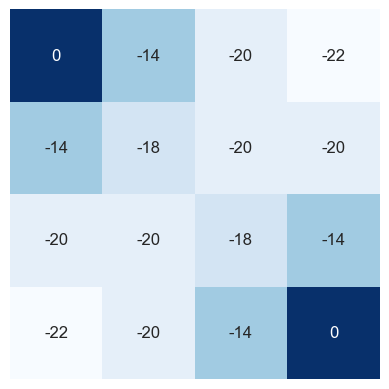

In [29]:
# Create a random policy
random_policy = np.ones([env.nS, env.nA]) / env.nA

# run policy iteration for random policy
V_pi = policy_eval(random_policy, env, discount_factor=1.0, theta=0.00001)

# Print policy
grid_print(V_pi.reshape(env.shape))

### Convergence

Let us now study the convergence of values as we iterate. We will modify `policy_eval` to print the values of states as we iterate. 

In [23]:
def policy_eval_withprint(
    policy, env,
    discount_factor=1.0,
    theta=0.00001,
    print_at=[]
):
    """
    Evaluate a policy given an environment and
    a full description of the environment's dynamics.

    Args:
        policy: [S, A]shaped matrix representing the policy. Random in our case
        env: OpenAI env. env.P -> transition dynamics of the environment.
            env.P[s][a] [(prob, next_state, reward, done)].
            env.nS is number of states in the environment.
            env.nA is number of actions in the environment.
        theta: Stop evaluation once value function change is
            less than theta for all states.
        discount_factor: Gamma discount factor.

    Returns:
        Vector of length env.nS representing the value function.
    """
    # Start with a (all 0) value function
    k = 0
    V = np.zeros(env.nS)
    V_new = np.copy(V)
    while True:
        k += 1
        delta = 0
        # For each state, perform a "backup"
        for s in range(env.nS):
            v = 0
            # Look at the possible next actions
            for a, pi_a in enumerate(policy[s]):
                # For each action, look at the possible next states...
                for prob, next_state, reward, done in env.P[s][a]:
                    # Calculate the expected value as per backup diagram
                    v += pi_a * prob * \
                        (reward + discount_factor * V[next_state])
            # How much our value function changed (across any states)
            V_new[s] = v
            delta = max(delta, np.abs(V_new[s] - V[s]))

        V = np.copy(V_new)
        # print grid for specified iteration values
        if k in print_at:
            grid_print(V.reshape(env.shape), k=k)
        # Stop if change is below a threshold
        if delta < theta:
            break
    grid_print(V.reshape(env.shape), k=k)
    return np.array(V)

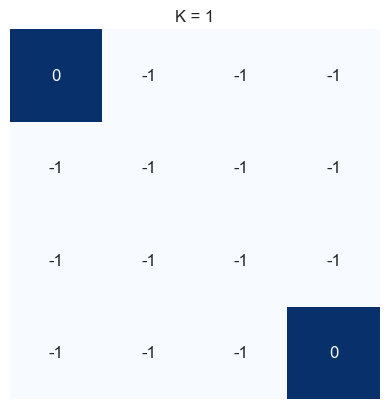

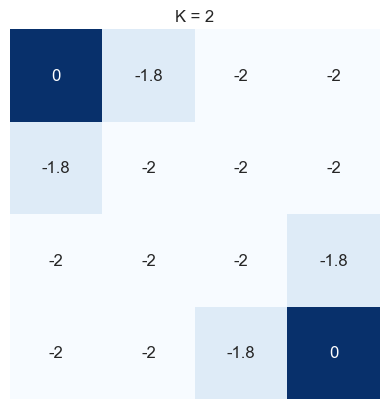

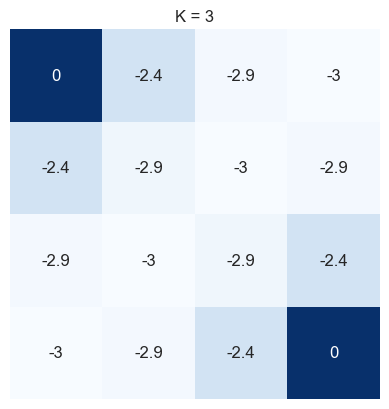

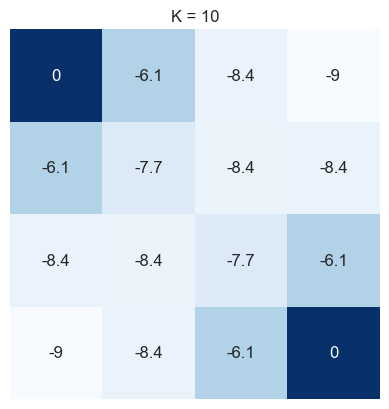

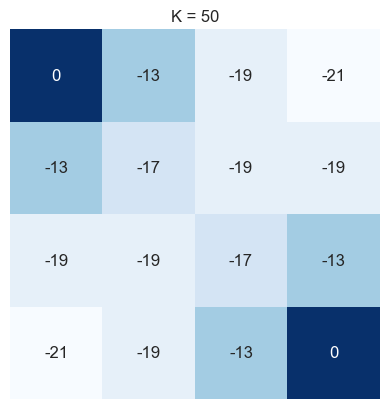

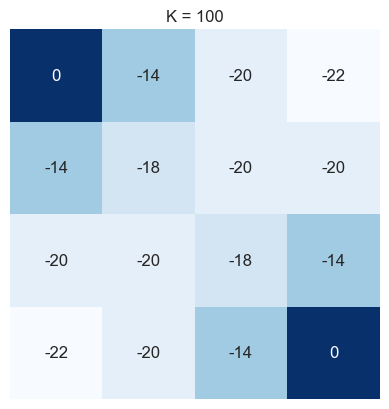

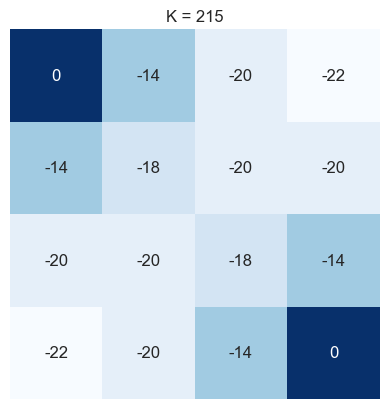

In [24]:
# run policy iteration for random policy and print interim state values
V_pi = policy_eval_withprint(
        random_policy,
        env,
        discount_factor=1.0,
        theta=0.00001,
        print_at=[1, 2, 3, 10, 50, 100])

### Conclusion

We see that state values start with -1 after first iteration. And then they slowly start to converge to the value $ V_{\pi}(S) $. By 50 iteration, they are fairly close. By 100th iteration, the values differ only in decimal values. Finally it takes about 200 iterations for the values to converge wherein the change in values during an iteration falls below the specified threshold 0.00001.